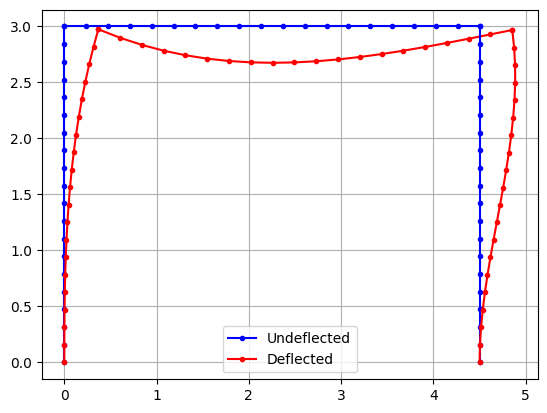

array([[[4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
         4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
         4.5       , 4.5       , 4.5       , 4.5       , 4.5       ,
         4.5       , 4.5       , 4.5       , 4.5       , 4.5       ],
        [3.        , 2.84210526, 2.68421053, 2.52631579, 2.36842105,
         2.21052632, 2.05263158, 1.89473684, 1.73684211, 1.57894737,
         1.42105263, 1.26315789, 1.10526316, 0.94736842, 0.78947368,
         0.63157895, 0.47368421, 0.31578947, 0.15789474, 0.        ]],

       [[4.85417341, 4.87468944, 4.88489251, 4.88583478, 4.87856839,
         4.86414552, 4.8436183 , 4.81803891, 4.78845948, 4.75593217,
         4.72150915, 4.68624256, 4.65118455, 4.61738729, 4.58590293,
         4.55778362, 4.53408152, 4.51584878, 4.50413755, 4.5       ],
        [2.96831008, 2.81208324, 2.65585639, 2.49962954, 2.3434027 ,
         2.18717585, 2.030949  , 1.87472216, 1.71849531, 1.56226846,
         1.40604162, 1.249814

In [1]:
from FEA.FEA import *
import numpy as np
import matplotlib.pyplot as plt


I = 1e-5
A = 5e-4
E = 200e9
L_1 = 3
L_2 = 4.5
L_3 = 3
angle_1 = 90
angle_2 = 0
angle_3 = -90

A_1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

A_2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


element1 = FrameElement(A_1, E, I, L_1, A, angle_1)
element2 = FrameElement(A_2, E, I, L_2, A, angle_2, UDL=-10e3, point_load=(L_2 / 2, 0, -50e3))
element3 = FrameElement(A_3, E, I, L_3, A, angle_3)

Q = np.array([
    [10e3],
    [0],
    [0],
    [10e3],
    [0],
    [0]
])

structure = Structure([element1, element2, element3], Q)

structure.solve()

nodes = np.array([
    [[0, 0], [0, 3]],
    [[0, 3], [4.5, 3]],
    [[4.5, 3], [4.5, 0]]
])

structure.plot_structure(nodes, 20, 20)